<a href="https://colab.research.google.com/github/kgnete/jupyter/blob/master/Copy_of_fotovoltaica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea de evaluación 1

1.- Calcular la irradiancia que se obtiene por m2 de panel solar en la ciudad de
Sevilla para una inclinación de los captadores de 45 o con la horizontal con acimut
0o.

2- Sobre la cubierta de una nave, con pendiente 15o, se pretende montar una
instalación fotovoltaica. Calcular la irradiancia que se obtiene por m2 de panel
fotovoltaico en la ciudad de Santander, sabiendo que la inclinación de los módulos
es de 35 o respecto de la cubierta de la nave.

3.- Calcula en número de módulos que forman un generador fotovoltaico para una
instalación de 10 Kw, sabiendo que los módulos fotovoltaicos son de la marca Jinko
solar modelo JKM310P, cuya cha técnica esta en el siguiente enlace
https://www.jinkosolar.com/ftp/SP-MKT-315P-72(4BB).pdf


4.- Calcular las distancias y alturas indicadas en el dibujo posterior, sabiendo que
los módulos fotovoltaicos tienen unas dimensiones de 1,65 x


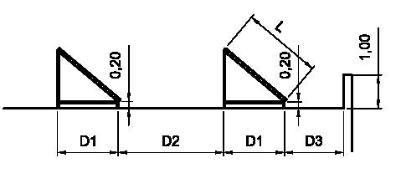


# DATOS DEL POTENCIAL SOLAR.
Los datos de radiación solar sobre super cie horizontal los podemos obtener de varios lugares

1./
El primer lugar donde los podemos obtener es de las distintas tablas facilitadas en
el Pliego de Condiciones Técnicas de Instalaciones de Baja Temperatura del
I.D.A.E.(Instituto para la Diversi cación y Ahorro de la Energía). Estos datos por
son los más conservadores de todos. Su enlace es el siguiente:
https://www.idae.es/uploads/documentos/documentos_5654_ST_Pliego_de_C
ondiciones_Tecnicas_Baja_Temperatura_09_082ee24a.pdf

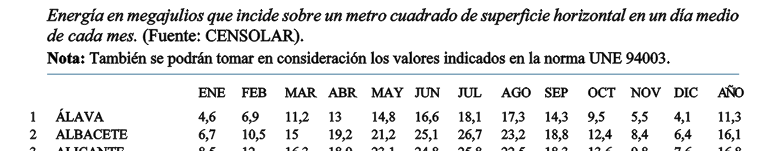

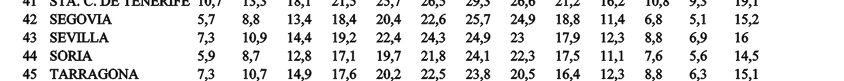

Otro lugar de donde obtener los datos es el indicado en el CTE DB HE-5 en su
apartado “4.1. Zonas Climáticas” subapartado 2, que indica “Para la asignación de
la zona climática de la tabla 4.1 podrán emplearse los datos de Radiación Solar
Global media diaria anual que para las capitales de provincia se recogen en el
documento “Atlas de Radiación Solar en España utilizando datos del SAF de Clima
de EUMETSAT”, publicado en el año 2012 por la Agencia Estatal de Meteorología.”
Cuyo enlace es :
https://www.aemet.es/documentos/es/serviciosclimaticos/datosclimatologicos/at
las_radiacion_solar/atlas_de_radiacion_24042012.pdf a partir de la página 94
del pdf.

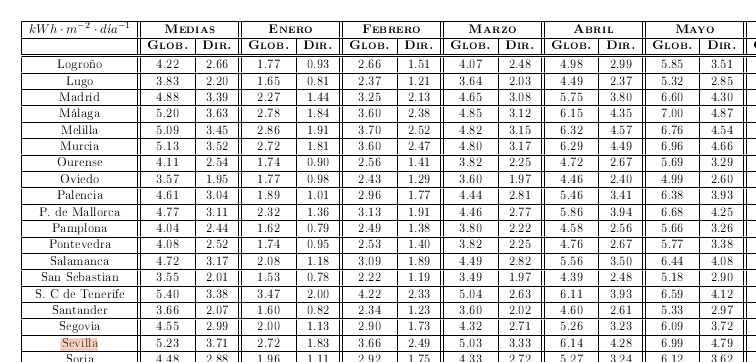

El ultimo y cuyos valores coinciden con el citado anteriormente, es la herramienta del IDAE, CHEQ4, que se usa para la comprobación de instalaciones solares térmicas


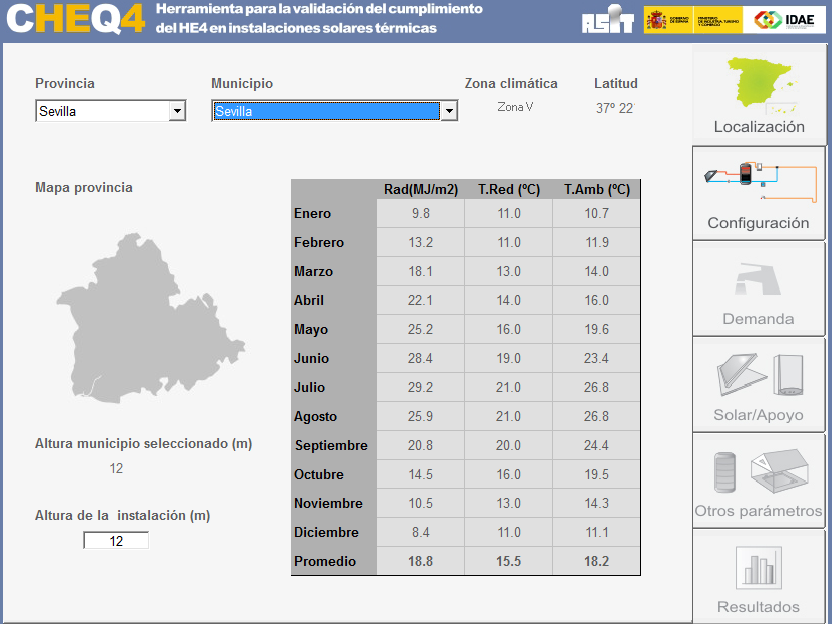

# Energía incidente sobre super cie inclinada (E)
Dado que los captadores se instalan con cierta inclinación, dicha energía sobre
super cie horizontal se ve modi cada por un coe ciente que es función de la
inclinación elegida para su montaje y la latitud donde se encuentre dicha
instalación.
Por lo tanto la energía incidente sobre una super cie inclinada será:
E = H x K
Donde K es un coe ciente obtenido al igual que los datos anteriores, que depende
de la latitud del lugar y la inclinación de los módulos
latitud de Sevilla 37.38

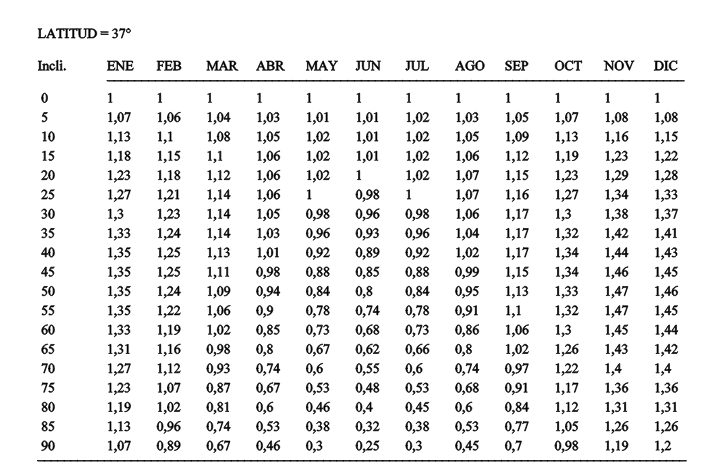

Dónde:

W = E / h

En cuya fórmula, al aplicarla las unidades deben estar expresadas en magnitudes
del sistema internacional, por lo tanto E (Julios) y h el no de horas de sol en
segundos.

In [0]:
# de  CHEQ4
# para el mes de enero por ejmplo Cadiz 45
#  la energía incidente sobre una super cie inclinada será: E = H x K 
H = 10 * 10**6 # irradiacion por m2 (J/m2)
K = 1.34 # coeficiente inclinacion-latitud
E = H * K  #  irradiancia por me2 (J/m2)
h = 8 * 3600 # tiempo de sol al dia (s)
W = E / h 


In [0]:
W # w / d
# al mes
W*31

14423.611111111111

usando https://ec.europa.eu/jrc/en/PVGIS/releases/pvgis51



api
no interactive service

https://ec.europa.eu/jrc/en/PVGIS/docs/noninteractive


https://re.jrc.ec.europa.eu/api/printhorizon?lat=45&lon=8&outputformat=json

https://re.jrc.ec.europa.eu/api/MRcalc?lat=45&lon=8&horirrad=1

In [0]:
! pip install requests

In [0]:
import requests as requests
response = requests.get("https://re.jrc.ec.europa.eu/api/MRcalc?lat=45&lon=8&horirrad=1&outputformat=json")
data = response.json()
print(data)
print(data["outputs"])
j=data["outputs"]

{'inputs': {'location': {'latitude': 45.0, 'longitude': 8.0, 'elevation': 250.0}, 'meteo_data': {'radiation_db': 'PVGIS-SARAH', 'meteo_db': 'ERA-Interim', 'year_min': 2005, 'year_max': 2016, 'use_horizon': True, 'horizon_db': None, 'horizon_data': 'DEM-calculated'}, 'plane': {'fixed_horizontal': {'slope': {'value': 0, 'optimal': '-'}, 'azimuth': {'value': '-', 'optimal': '-'}}}}, 'outputs': {'monthly': [{'year': 2005, 'month': 1, 'H(h)_m': 57.77}, {'year': 2005, 'month': 2, 'H(h)_m': 77.76}, {'year': 2005, 'month': 3, 'H(h)_m': 120.58}, {'year': 2005, 'month': 4, 'H(h)_m': 133.31}, {'year': 2005, 'month': 5, 'H(h)_m': 195.3}, {'year': 2005, 'month': 6, 'H(h)_m': 212.63}, {'year': 2005, 'month': 7, 'H(h)_m': 218.83}, {'year': 2005, 'month': 8, 'H(h)_m': 181.94}, {'year': 2005, 'month': 9, 'H(h)_m': 117.98}, {'year': 2005, 'month': 10, 'H(h)_m': 75.09}, {'year': 2005, 'month': 11, 'H(h)_m': 43.49}, {'year': 2005, 'month': 12, 'H(h)_m': 40.47}, {'year': 2006, 'month': 1, 'H(h)_m': 51.23},

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame([[d['v'] for d in x['c']] for x in j['rows']],
                  columns=[d['label'] for d in j['cols']])

KeyError: ignored

In [0]:
import requests
import pandas as pd

r = requests.get('http://www.starcapital.de/test/Res_Stockmarketvaluation_FundamentalKZ_Tbl.php')

j = r.json()

df = pd.DataFrame([[d['v'] for d in x['c']] for x in j['rows']],columns=[d['label'] for d in j['cols']])

JSONDecodeError: ignored

In [0]:
# !pip install pvlib

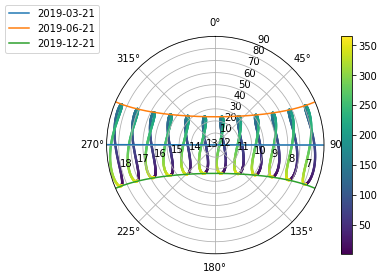

In [0]:
from pvlib import solarposition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tz = 'Asia/Calcutta'
lat, lon = 0, 77.2

times = pd.date_range('2019-01-01 00:00:00', '2020-01-01', closed='left',
                      freq='H', tz=tz)
solpos = solarposition.get_solarposition(times, lat, lon)
# remove nighttime
solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]

ax = plt.subplot(1, 1, 1, projection='polar')
# draw the analemma loops
points = ax.scatter(np.radians(solpos.azimuth), solpos.apparent_zenith,
                    s=2, label=None, c=solpos.index.dayofyear)
ax.figure.colorbar(points)

# draw hour labels
for hour in np.unique(solpos.index.hour):
    # choose label position by the smallest radius for each hour
    subset = solpos.loc[solpos.index.hour == hour, :]
    r = subset.apparent_zenith
    pos = solpos.loc[r.idxmin(), :]
    ax.text(np.radians(pos['azimuth']), pos['apparent_zenith'], str(hour))

# draw individual days
for date in pd.to_datetime(['2019-03-21', '2019-06-21', '2019-12-21']):
    times = pd.date_range(date, date+pd.Timedelta('24h'), freq='5min', tz=tz)
    solpos = solarposition.get_solarposition(times, lat, lon)
    solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]
    label = date.strftime('%Y-%m-%d')
    ax.plot(np.radians(solpos.azimuth), solpos.apparent_zenith, label=label)

ax.figure.legend(loc='upper left')

# change coordinates to be like a compass
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rmax(90)

plt.show()